### Τεχνολογίες Κινητού Υπολογισμού με Μηχανική Μάθηση
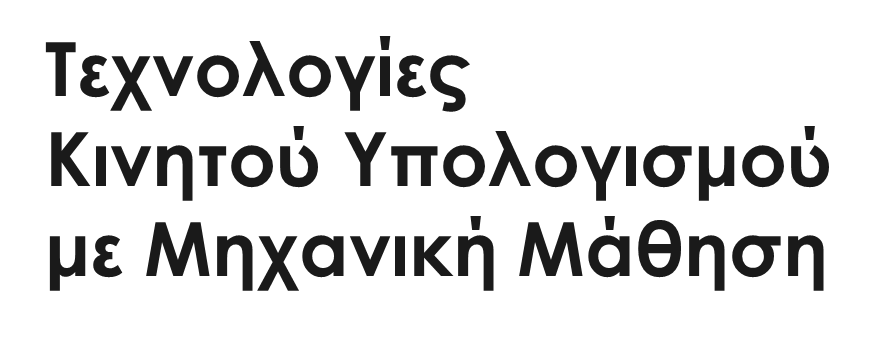
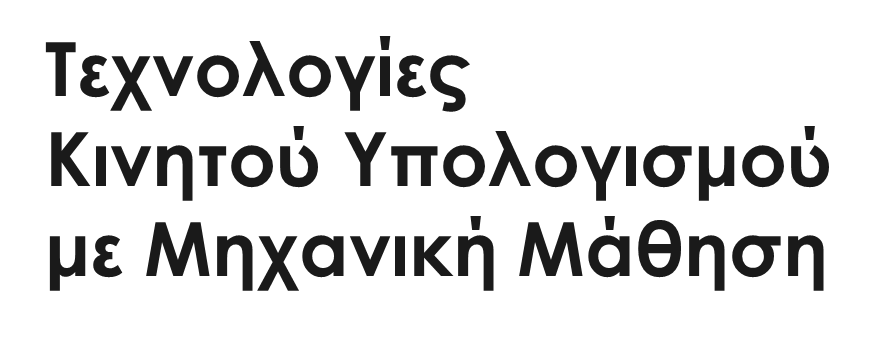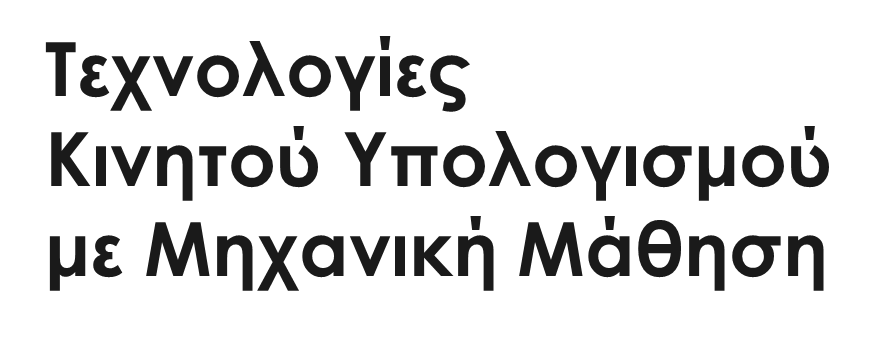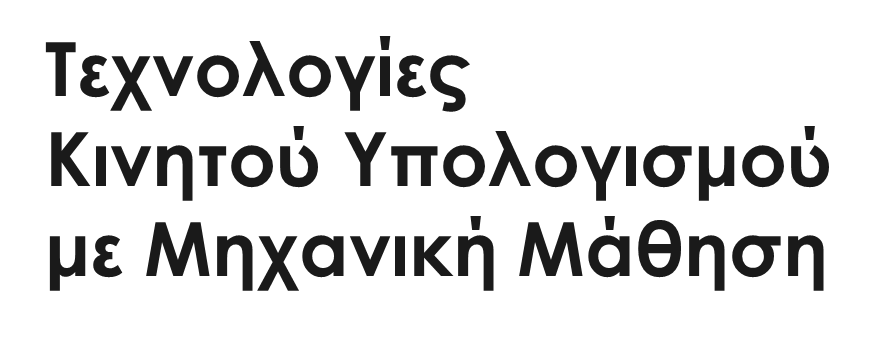
#### 1η Εργαστηριακή Άσκηση 

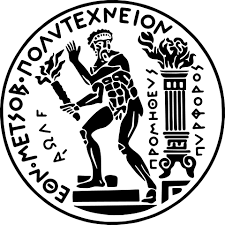

Σχολή Ηλεκτρολόγων Μηχανικών και Μηχανικών Υπολογιστών

Εργαστήρι Ευφυών Επικοινωνιών και Δικτύων Ευρείας Ζώνης

Εθνικό Μετσόβιο Πολυτεχνείο

9ο εξάμηνο

Ακ. Έτος 2024-2025



 `⚠️  Παρακαλείστε να μην δημοσιεύσετε τις απαντήσεις και υλοποιήσεις των εργαστηριακών ασκήσεων στο διαδίκτυο. Ο λόγος είναι η πιθανή επανάληψη των συγκεκριμένων ασκήσεων σε επόμενα ακαδημαικά έτη.`

 `⚠️  Τα χαρακτηριστικά του συνόλου δεδομένων που σας δόθηκαν μπορούν φυσικά να τροποποιηθούν με χρήση στατιστικών μεθόφων ή ακόμα και να παραλειφθούν. Ωστόσο, σε καμία περίπτωση, το σύνολο δεδομένων δεν πρέπει να εμπλουτισθεί με επιπλέον εγγραφές. Πιθανές τέτοιες ενέργειες θα κοστίσουν στην τελική βαθμολόγηση της εργασίας σας.`

Ονοματεπώνυμο φοιτητή:

Α.Μ.:

### 1. Εισαγωγή συνόλου δεδομένων

Η κάθε ομάδα μπορεί να κατεβάσει το προσωποποιημένο σύνολο δεδομένων για το training-(validation)-test από [εδώ](https://drive.google.com/drive/folders/1lO6elfOldaqSw7k-UWvZBZTWKdmisp5b?usp=sharing).



In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

1.α. Φορτώστε το σύνολο δεδομένων στο notebook σας.

In [2]:
#Importing Data On Kaggle:
df_data = pd.read_csv('/kaggle/input/5g-qos/dataset_new.csv')

1.β. Τυπώστε τις πρώτες 5 ή 10 γραμμές του dataset για να δείτε ότι έχει φορτωθεί όπως πρέπει

In [3]:
df_data.head(10)

,X,Y,base_station_user,sector_of_BS_user,sector_user,ModulationType,Power_W_,BS_UEDistance_km_,BS_UEAngle_degrees_,Throughput_Mbps_
0,-1538.494704,1229.952836,10,1,28,QPSK,0.176421,2.175760,195.063406,379.315339
1,-1392.160776,1583.572523,9,1,25,16-QAM,0.053331,1.968813,326.605415,299.266046
2,34.900399,-1440.542036,1,1,1,QPSK,0.000312,0.049357,347.032825,1161.318447
3,-1482.404758,1613.021019,9,1,25,16-QAM,0.125557,2.096437,152.344674,814.071594
4,1451.921185,521.828373,12,2,35,64-QAM,0.017777,2.053327,314.814695,1192.715985
5,616.326717,-1554.882990,7,1,19,64-QAM,0.013619,0.871618,192.214154,628.549844
6,159.214320,-852.220482,1,3,3,16-QAM,0.005459,0.225163,215.237927,241.695996
7,-981.174170,189.916792,14,2,41,64-QAM,0.219217,1.387590,263.987159,1492.662793
8,1034.613979,1784.382421,17,3,51,QPSK,0.215195,1.463165,284.441736,176.481929
9,-1046.819888,1813.045696,16,2,47,16-QAM,0.173601,1.480427,0.643953,317.376338


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    10075 non-null  float64
 1   Y                    10075 non-null  float64
 2   base_station_user    10075 non-null  int64  
 3   sector_of_BS_user    10075 non-null  int64  
 4   sector_user          10075 non-null  int64  
 5   ModulationType       10075 non-null  object 
 6   Power_W_             10075 non-null  float64
 7   BS_UEDistance_km_    10075 non-null  float64
 8   BS_UEAngle_degrees_  10075 non-null  float64
 9   Throughput_Mbps_     10075 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 787.2+ KB


### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA) 
Με βάση το notebook της παρουσίασης της 2ης εργαστηριακής άσκησης δημιουργήστε code cells με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων. Συνίσταται η χρήση text cells για επεξήγηση των αποτελεσμάτων της EDA. 

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων (είναι ισοροππημένο το σύνολο δεδομένων;),

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών, 

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [5]:
n_samples = len(df_data)
print(f"Number of samples: {n_samples}")
n_features = df_data.shape[1]
print(f"Number of features: {n_features}")


Number of samples: 10075
Number of features: 10


Low Ratio: 12.89%
High Ratio: 87.11%


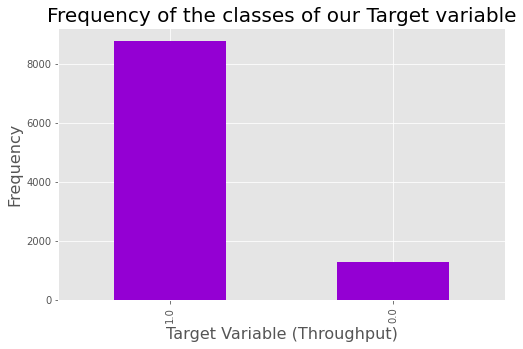

In [6]:
# df_data['Throughput_cat'] = df_data['Throughput_Mbps_'].apply(lambda x: 0 if x < 300 else 1)

df_data['Throughput_Mbps_'].mask(df_data['Throughput_Mbps_'] <= 300, 0, inplace=True)
df_data['Throughput_Mbps_'].mask(df_data['Throughput_Mbps_'] > 300, 1, inplace=True)
df_data.rename(columns={'Throughput_Mbps_': 'Throughput'}, inplace=True)


plt.style.use("ggplot")
df_data['Throughput'].value_counts().plot(kind="bar", figsize = (8,5), color = "darkviolet")
plt.title("Frequency of the classes of our Target variable", size=20)
plt.xlabel("Target Variable (Throughput)", size = 16)
plt.ylabel("Frequency", size = 16)

category_counts = df_data['Throughput'].value_counts()
low_ratio = category_counts[0] / n_samples
high_ratio = category_counts[1] / n_samples
print(f"Low Ratio: {low_ratio:.2%}")
print(f"High Ratio: {high_ratio:.2%}")

Για να αποφανθούμε αν το σύνολο δεδομένων είναι ισορροπημένο, θέλουμε να δούμε την κατανομή των κλάσσεων του χαρακτηριστικού που θέλουμε να προβλέψουμε που είναι το throughput. Έτσι δημιουργούμε δύο κλάσσεις, μία 'Low' και μία 'High' για τιμές <300 και >300 αντίστοιχα. Όπως βλέπουμε το dataset δεν είναι ισορροπημένο. Το ποσοστό υψηλών τιμών throughput κυριαρχεί των χαμηλών τιμών με 87.11% έναντι του συνόλου τιμών. 

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    10075 non-null  float64
 1   Y                    10075 non-null  float64
 2   base_station_user    10075 non-null  int64  
 3   sector_of_BS_user    10075 non-null  int64  
 4   sector_user          10075 non-null  int64  
 5   ModulationType       10075 non-null  object 
 6   Power_W_             10075 non-null  float64
 7   BS_UEDistance_km_    10075 non-null  float64
 8   BS_UEAngle_degrees_  10075 non-null  float64
 9   Throughput           10075 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 787.2+ KB


In [8]:
df_data.columns

Index(['X', 'Y', 'base_station_user', 'sector_of_BS_user', 'sector_user',
       'ModulationType', 'Power_W_', 'BS_UEDistance_km_',
       'BS_UEAngle_degrees_', 'Throughput'],
      dtype='object')

In [9]:
print(f"Number of categories: {df_data['Throughput'].nunique()}")
print(f"number of samples in Low Category: {category_counts[0]}")
print(f"number of samples in High Category: {category_counts[1]}")

Number of categories: 2
number of samples in Low Category: 1299
number of samples in High Category: 8776


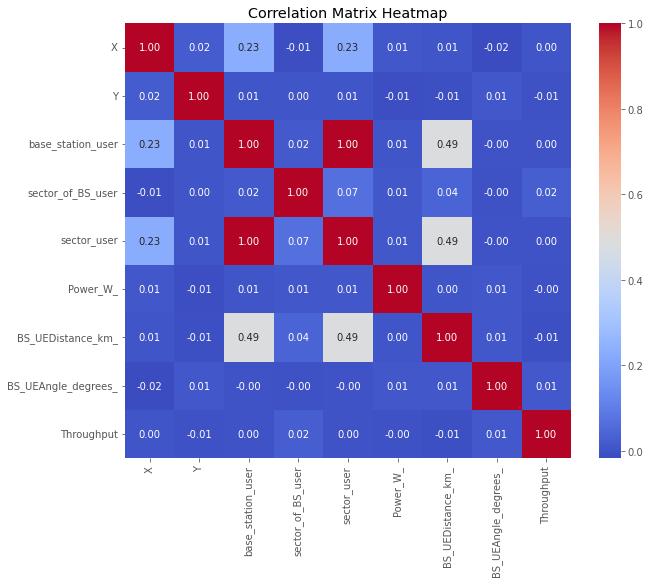

Correlation with 'throughput':
X                      0.002827
Y                     -0.005108
base_station_user      0.000067
sector_of_BS_user      0.023367
sector_user            0.001209
Power_W_              -0.004732
BS_UEDistance_km_     -0.009437
BS_UEAngle_degrees_    0.011202
Throughput             1.000000
dtype: float64


In [10]:
correlation_matrix = df_data.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

throughput_corr = df_data.corrwith(df_data['Throughput'])
print("Correlation with 'throughput':")
print(throughput_corr)


Παρατηρούμε 100% συσχέτιση μεταξύ του σταθμού βάσης εξυπηρέτησης (base staton user) και του τομέα εξυπηρέτησης (sector user).

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Επεξεργαστείτε τα χαρακτηριστικά του συνόλου δεδομένων σας. Αν θεωρείτε ότι κάποια χαρακτηριστικά θα πρέπει να μετασχηματιστούν κάντε το χρησιμοποιώντας τους OneHotEncoder και LabelEncoder (αριθμητικά και κατηγορικά δεδομένα).`




3.α.  Το σύνολο δεδομένων σας περιέχει Null values; Αν όχι αποδείξτε το με κατάλληλη εντολή. Αν ναι θα αντικαταστήσετε αυτές τις τιμές ή θα τις παραλείψετε απλώς. (Εξηγήστε)

In [11]:
null_cnt = df_data.isnull().sum()
print(null_cnt)

X                      0
Y                      0
base_station_user      0
sector_of_BS_user      0
sector_user            0
ModulationType         0
Power_W_               0
BS_UEDistance_km_      0
BS_UEAngle_degrees_    0
Throughput             0
dtype: int64


Δεν υπάρχουν null values. 

3.β.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ML models ή κάνετε κάποια επιλογή;  Εξηγήστε. 


3.γ. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

3.δ. Επιτελέστε κλιμάκωση των χαρακτηριστικών του συνόλου δεδομένων σας (αν την θεωρείτε απαραίτητη). Σε αυτήν την περίπτωση χρησιμοποιήστε τον MimMaxScaler

3.ε. Αφού έχετε επεξεργαστεί (μέσω των προηγουμένων βημάτων) το σύνολο δεδομένων σας, χωρίστε το σε σύνολο εκπαίδευσης και σύνολο επαλήθευσης. Ξεκινήστε με μια αναλογία 80%-20%. Πειραματιστείτε με διαφορετικές τιμές αν το κρίνετε απαραίτητο για την βελτίωση των δεικτών απόδοσης.

💡 `Η στήλη 'Troughput' είναι αυτή που θα πρέπει να χρησιμοποιηθεί ως μεταβλητή απόκρισης στο regression πρόβλημα που καλείστε να επιλύσετε.` 

3.στ. Χρησιμοποιήστε την τεχνική Chi-Squared Feature Selection για να μελετήσετε την σημαντικότητα του εκάστοτε χαρακτηριστικού

3.ζ. Δημιουργήστε κατάλληλο διάγραμμα ώστε να αποτυπώσετε την μελετούμενη σημαντικότητα

### 4. Εκπαίδευση ML μοντέλων για την αντιμετώπιση του Throughput prediction ως πρόβλημα παλινδρόμισης

Θα εκπαιδεύσετε τους ML αλγορίθμους που σας έχουν γνωστοποιηθεί μέσω προσωπικού μηνύματος ξεκινώντας με default τιμές στις παραμέτρους αυτών


4.α. Φορτώστε τις κατάλληλες βιβλιοθήκες

4.β. Εκπαιδεύστε (fit) τους ML αλγορίθμους σας χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

4.γ. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το test set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


4.δ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του test set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας τις ML μετρικές (ML KPIs) που αναφέρονται στην εκφώνηση της 2ης εργαστηριακής άσκησης (θα χρειαστεί import των αντίστοιχων μετρικών από το sklearn).

4.στ. Απεικονίστε την παραπάνω αξιολόγηση με χρήση γραφήματος/γραφημάτων (π.χ. ιστόγραμμα, bar plot κατά προτίμιση της Matplotlib)

4.ζ Σχολιάστε στην αναφορά σας το ποιο μοντέλο είχε την καλύτερη επίδοση. Ήταν αυτό αναμενόμενο με βάση τη θεωρία του 3.2 κεφαλαίου των σημειώσεών σας;

4.η Κάνοντας δοκιμές στις υπερπαραμέτρους των ML αλγορίθμων που υλοποιήσατε, προσπαθήστε να βελτιώσετε την επίδοσή τους με βάση τις μετρικές τις οποίες έχετε επιλέξει

### Bonus Ερώτημα

Για μια πιο αποτελεσματική εύρεση των υπερπαραμέτρων που βελτιστοποιούν την απόδοση των ML αλγορίθμων, γίνεται χρήση κάποιας συστηματικής αναζήτησης. Δοκιμάστε αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 10) (Πληροφορίες [εδώ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)) ή/και HalvingGridSearch (Πληροφορίες [εδώ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html)) με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων. 

Εφαρμόστε στα εκπαιδευμένα μοντέλα από το test set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).

Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του test set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας τις ML μετρικές (ML KPIs) που αναφέρονται στην εκφώνηση της 2ης εργαστηριακής άσκησης.

Απεικονίστε την παραπάνω αξιολόγηση με χρήση γραφήματος/γραφημάτων (π.χ. ιστόγραμμα, bar plot κατά προτίμιση της Matplotlib)

Σχολιάστε στην αναφορά σας το ποιο μοντέλο είχε την καλύτερη επίδοση. Ήταν αυτό αναμενόμενο με βάση τη θεωρία του 3.2 κεφαλαίου των σημειώσεών σας; Σχολιάστε επίσης την βελτίωση σε σχέση με την default υλοποίηση